In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ensembles = list(range(0,61))

In [3]:
sio2_dict = {ensemble:{} for ensemble in ensembles}
n_impact_dict = {}
for ensemble in ensembles:
    for layer in range(12):
        with open("./sio2_percent_tables/bound_30jan2022/ensemble_{:d}_{:d}.csv".format(ensemble, layer), "r")as f:
            sio2_dict[ensemble][layer] = pd.read_csv(f).fillna(0)
    with open("./impact_probabilities_export_bound_30jan2022/ensemble_{:d}.csv".format(ensemble), "r")as f:
        n_impact_dict[ensemble] = pd.read_csv(f).fillna(0)

In [4]:
df = sio2_dict[1][0].loc[:,[str(p) for p in range(60,71)]].sum(axis=1) / 40


In [12]:
sio2_dict[ensemble]

{0:      Unnamed: 0         45         50         51         52         53  \
 0             0  79.260601  20.739399   0.000000   0.000000   0.000000   
 1             1  69.404187  28.160225   2.435588   0.000000   0.000000   
 2             2  50.328771  48.705046   0.966184   0.000000   0.000000   
 3             3  38.862050  56.347289   0.369028   1.818304   1.690821   
 4             4  29.683306  59.520934   2.683843   7.051798   0.000000   
 ..          ...        ...        ...        ...        ...        ...   
 495         495   0.040258  11.775362  22.450349  18.880837  12.453033   
 496         496   0.040258  11.775362  22.450349  18.880837  12.453033   
 497         497   0.040258  11.775362  22.450349  18.880837  12.453033   
 498         498   0.040258  11.775362  22.450349  18.853999  12.453033   
 499         499   0.040258  11.775362  22.450349  18.853999  12.453033   
 
            55        59        60        54  ...       80        77        78  \
 0    0.00000

In [39]:
df

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Length: 500, dtype: float64

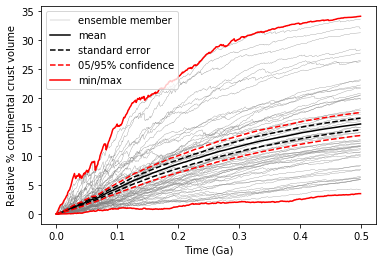

In [70]:
n_layers=1
crust_dict = {}
for ensemble in ensembles:
    for layer in range(n_layers):
        
        percent_bins=[]
        for p in range(60,101):
            if str(p) in list(sio2_dict[ensemble][layer].columns.values):
                percent_bins.append(str(p))
                
        df = sio2_dict[ensemble][layer].loc[:,percent_bins].sum(axis=1)

        if layer == 0:
            crust_dict[ensemble] = df.values
        else:
            crust_dict[ensemble] += df.values
            
    if ensemble == 0:
        plt.plot(df.index.values/1000, df.values, lw=0.3, c='grey', label='ensemble member')
    else:
        plt.plot(df.index.values/1000, df.values, lw=0.3, c='grey')
            
    crust_df = pd.DataFrame(crust_dict, index=df.index.values)
    
    crust_mean = crust_df.mean(axis=1)

crust_df['mean'] = crust_df.mean(axis=1)
crust_df['min'] = crust_df.min(axis=1)
crust_df['max'] = crust_df.max(axis=1)
crust_df['stdev'] = crust_df.std(axis=1)
standard_error = crust_df['stdev']/np.sqrt(len(ensembles))
crust_df['e05'] = crust_df['mean'] - standard_error
crust_df['e95'] = crust_df['mean'] + standard_error
crust_df['c95'] = crust_df['mean'] + standard_error * 1.96
crust_df['c05'] = crust_df['mean'] - standard_error * 1.96

plt.plot(df.index.values/1000, crust_df['mean'], c='k', label='mean')
plt.plot(df.index.values/1000, crust_df['e05'], '--', c='k', label='standard error')
plt.plot(df.index.values/1000, crust_df['e95'], '--', c='k')
plt.plot(df.index.values/1000, crust_df['c05'].clip(lower=0), '--', c='r', label='05/95% confidence')
plt.plot(df.index.values/1000, crust_df['c95'], '--', c='r')
plt.plot(df.index.values/1000, crust_df['min'].clip(lower=0), c='r', label='min/max')
plt.plot(df.index.values/1000, crust_df['max'], c='r')
plt.xlabel("Time (Ga)")
plt.ylabel("Relative % continental crust volume")
#plt.ylim([0,20])
plt.legend()
# plt.savefig('./figs/paper_figs/relative_percent_crust_over_time_bound.pdf', dpi=600)
# plt.savefig('./figs/paper_figs/relative_percent_crust_over_time_bound.png', dpi=600)
plt.show()
plt.close()

In [49]:
final_values = {summary_characteristic:[] for summary_characteristic in ['mean', 'min', 'max',
                                                                         'standard_error', 'CI95']}
for i in range(3,len(ensembles)+1):
    crust_dict = {}
    for ensemble in ensembles[:i]:
        percent_bins=[]
        for p in range(60,100):
            if str(p) in list(sio2_dict[ensemble][0].columns.values):
                percent_bins.append(str(p))
        df = 100* sio2_dict[ensemble][0].loc[:,percent_bins].sum(axis=1) / 40
        crust_dict[ensemble] = df.values
    crust_df = pd.DataFrame(crust_dict, index=df.index.values)
    crust_mean = crust_df.mean(axis=1)
    crust_df['mean'] = crust_df.mean(axis=1)
    crust_df['min'] = crust_df.min(axis=1)
    crust_df['max'] = crust_df.max(axis=1)
    crust_df['stdev'] = crust_df.std(axis=1)
    standard_error = crust_df['stdev']/np.sqrt(len(ensembles))
    crust_df['e05'] = crust_df['mean'] - standard_error
    crust_df['e95'] = crust_df['mean'] + standard_error
    crust_df['c95'] = crust_df['mean'] + standard_error * 1.96
    crust_df['c05'] = crust_df['mean'] - standard_error * 1.96
    final_values['mean'].append(crust_df['mean'][499])
    final_values['min'].append(crust_df['min'][499])
    final_values['max'].append(crust_df['max'][499])
    final_values['standard_error'].append(standard_error[499])
    final_values['CI95'].append(standard_error[499] * 1.96)

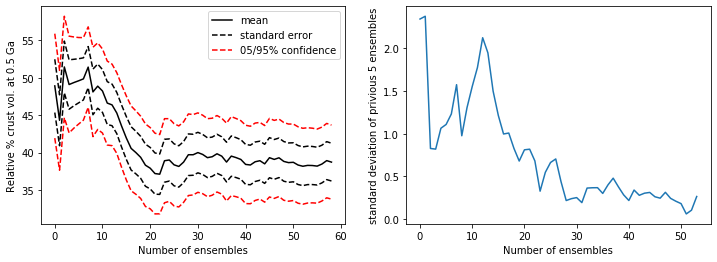

In [50]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1, 2, 1)    
ax.plot(final_values['mean'], c='k', label='mean')
ax.plot(np.array(final_values['mean'])+np.array(final_values['standard_error']), 
         '--', c='k', label='standard error')
ax.plot(np.array(final_values['mean'])-np.array(final_values['standard_error']),'--', c='k', )
ax.plot(np.array(final_values['mean'])+np.array(final_values['CI95']), 
         '--', c='r', label='05/95% confidence')
ax.plot(np.array(final_values['mean'])-np.array(final_values['CI95']),'--', c='r', )
ax.set_xlabel("Number of ensembles")
ax.set_ylabel("Relative % crust vol. at 0.5 Ga")
plt.legend()

std_last_5_ens = []
for i in range(5,len(final_values['mean'])):
    std_last_5_ens.append(np.std(final_values['mean'][i-5:i]))
ax = fig.add_subplot(1, 2, 2)
ax.plot(std_last_5_ens)
ax.set_xlabel("Number of ensembles")
ax.set_ylabel("standard deviation of privious 5 ensembles")
plt.savefig('./figs/paper_figs/ensemble_convergence_bound.pdf', dpi=600)
plt.savefig('./figs/paper_figs/ensemble_convergence_bound.png', dpi=600)
plt.show()
plt.close()

In [51]:
total_impact_dict = {}
total_impact_dict['low'] = n_impact_dict[ensemble].low
total_impact_dict['high'] = n_impact_dict[ensemble].high
for ensemble in ensembles:
    total_impact_dict[ensemble] = n_impact_dict[ensemble].total

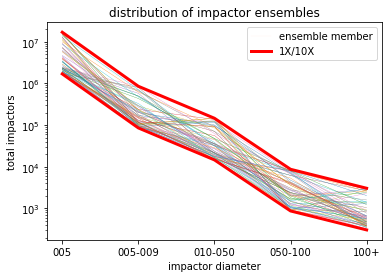

In [52]:
for ensemble in ensembles:
    if ensemble == 1:
        plt.plot(total_impact_dict[ensemble], lw=0.03, label="ensemble member")
    else:
        plt.plot(total_impact_dict[ensemble], lw=0.3)
plt.plot(n_impact_dict[1]['Unnamed: 0'], total_impact_dict['low'], c='r', lw=3, label='1X/10X')
plt.plot(n_impact_dict[1]['Unnamed: 0'], total_impact_dict['high'], c='r', lw=3)
plt.ylabel('total impactors')
plt.yscale('log')
plt.xlabel("impactor diameter")
plt.title("distribution of impactor ensembles")
plt.legend()
plt.savefig('./figs/paper_figs/total_impacts_bound.pdf', dpi=600)
plt.savefig('./figs/paper_figs/total_impacts_bound.png', dpi=600)
plt.show()
plt.close()

In [56]:
max_sio2_df

,0,1,2,3,4,5,6,7,8,9,...,59,60,mean,min,max,stdev,e05,e95,c95,c05
0,50,50,51,50,50,50,50,50,50,51,...,51,50,50.114754,50.0,51.0,0.332959,50.072123,50.157385,50.198311,50.031197
1,50,50,61,59,59,59,59,59,60,61,...,61,51,56.163934,50.0,61.0,4.204523,55.625600,56.702268,57.219069,55.108800
2,59,59,61,60,59,59,59,59,60,72,...,62,51,58.868852,50.0,72.0,4.531636,58.288636,59.449069,60.006077,57.731628
3,59,59,61,60,59,52,59,65,60,73,...,62,60,60.049180,50.0,73.0,4.994331,59.409722,60.688639,61.302519,58.795842
4,59,59,61,73,65,61,61,68,61,73,...,75,60,62.573770,59.0,80.0,5.469054,61.873530,63.274011,63.946242,61.201299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,80,80,80,80,80,80,80,80,80,80,...,80,80,80.000000,80.0,80.0,0.000000,80.000000,80.000000,80.000000,80.000000
496,80,80,80,80,80,80,80,80,80,80,...,80,80,80.000000,80.0,80.0,0.000000,80.000000,80.000000,80.000000,80.000000
497,80,80,80,80,80,80,80,80,80,80,...,80,80,80.000000,80.0,80.0,0.000000,80.000000,80.000000,80.000000,80.000000
498,80,80,80,80,80,80,80,80,80,80,...,80,80,80.000000,80.0,80.0,0.000000,80.000000,80.000000,80.000000,80.000000


In [53]:
max_sio2_list={layer:{} for layer in range(12)}
for layer in range(11):
    for ensemble in ensembles:
        max_sio2_list[layer][ensemble]=[]
        for irow in sio2_dict[ensemble][layer].index.values:
            max_sio2_percent=0
            for icol in sio2_dict[ensemble][layer].columns.values[1:]:
                if sio2_dict[ensemble][layer].loc[irow,icol] > 0:
                    if int(icol) > max_sio2_percent:
                        max_sio2_percent = int(icol)
            max_sio2_list[layer][ensemble].append(max_sio2_percent)

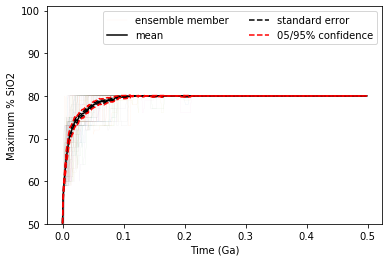

In [54]:
max_sio2_df          = pd.DataFrame(max_sio2_list[0])
max_sio2_df['mean']  = max_sio2_df.mean(axis=1)
max_sio2_df['min']   = max_sio2_df.min(axis=1)
max_sio2_df['max']   = max_sio2_df.max(axis=1)
max_sio2_df['stdev'] = max_sio2_df.std(axis=1)
standard_error       = max_sio2_df['stdev']/np.sqrt(len(ensembles))
max_sio2_df['e05']   = max_sio2_df['mean'] - standard_error
max_sio2_df['e95']   = max_sio2_df['mean'] + standard_error
max_sio2_df['c95']   = max_sio2_df['mean'] + standard_error * 1.96
max_sio2_df['c05']   = max_sio2_df['mean'] - standard_error * 1.96
for ensemble in ensembles:
    if ensemble == 1:
        plt.plot(max_sio2_df.index.values/1000, max_sio2_list[0][ensemble], 
                 lw=0.03, label="ensemble member")        
    else:
        plt.plot(max_sio2_df.index.values/1000, max_sio2_list[0][ensemble], lw=0.03)

plt.plot(max_sio2_df.index.values/1000, max_sio2_df['mean'], c='k', label='mean')
plt.plot(max_sio2_df.index.values/1000, max_sio2_df['e05'], '--', c='k', label='standard error')
plt.plot(max_sio2_df.index.values/1000, max_sio2_df['e95'], '--', c='k')
plt.plot(max_sio2_df.index.values/1000, max_sio2_df['c05'].clip(lower=0), '--', c='r', label='05/95% confidence')
plt.plot(max_sio2_df.index.values/1000, max_sio2_df['c95'], '--', c='r')
# plt.plot(max_sio2_df.index.values/1000, max_sio2_df['min'].clip(lower=0), c='r', label='min/max')
# plt.plot(max_sio2_df.index.values/1000, max_sio2_df['max'], c='r')
plt.xlabel("Time (Ga)")
plt.ylabel("Maximum % SiO2")
plt.ylim([50,101])
plt.legend(ncol=2)
plt.savefig('./figs/paper_figs/max_sio2_bound.pdf', dpi=600)
plt.savefig('./figs/paper_figs/max_sio2_bound.png', dpi=600)
plt.show()
plt.close()

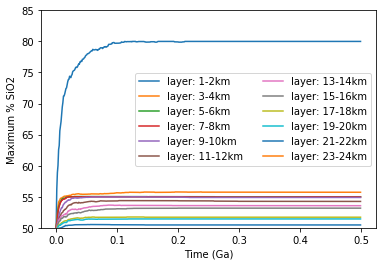

In [65]:
llyr = {0:"1-2km",1:"3-4km",2:"5-6km",3:"7-8km",4:"9-10km",5:"11-12km",
        6:"13-14km",7:"15-16km",8:"17-18km",9:"19-20km",10:"21-22km",11:"23-24km"}
for layer in range(12):
    max_sio2_df          = pd.DataFrame(max_sio2_list[layer])
    max_sio2_df['mean']  = max_sio2_df.mean(axis=1)
    plt.plot(max_sio2_df.index.values/1000, max_sio2_df['mean'], label=f'layer: {llyr[layer]}')
plt.xlabel("Time (Ga)")
plt.ylabel("Maximum % SiO2")
plt.ylim([50,85])
plt.legend(ncol=2)
plt.savefig('./figs/paper_figs/max_sio2_bound.pdf', dpi=600)
plt.savefig('./figs/paper_figs/max_sio2_bound.png', dpi=600)
plt.show()
plt.close()